In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1 简单练习
输出一个5*5的单位矩阵

In [2]:
A = np.eye(5)
print(A)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### 2 单变量的线性回归

整个2的部分需要根据城市人口数量，预测开小吃店的利润

数据在ex1data.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。

#### 2.1 Plotting the Data

读入数据，然后展示数据

In [3]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


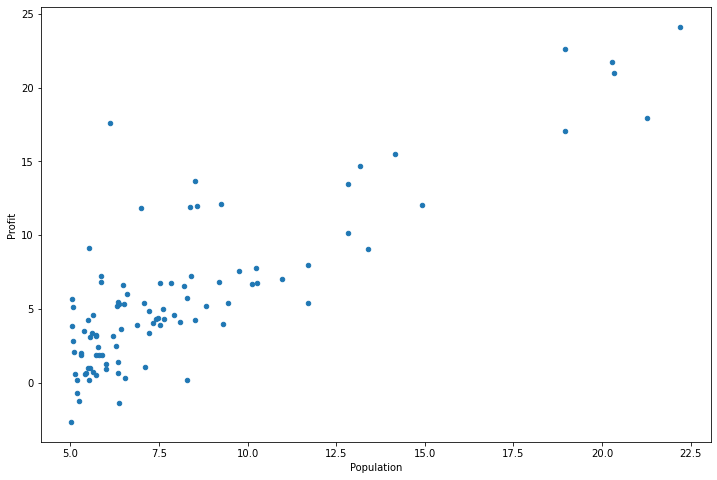

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))
plt.show()

#### 2.2 梯度下降
这个部分需要在现有数据集上，训练线性回归的参数$\theta$

##### 2.2.1 公式
$$
J(\theta) = \frac{1}{2m} \sum^m_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})^2
$$

In [5]:
def computerCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

##### 2.2.2 实现

数据前面已经读取完毕，要加入一列x，用于更新$\theta_0$，然后将$\theta$初始化为0，学习率初始化为0.01，迭代次数为1500次

In [6]:
data.insert(0, 'Ones', 1)

现在来做一些变量初始化。

In [7]:
cols = data.shape[1]
X = data.iloc[:, : -1]
y = data.iloc[:, cols-1: cols]

观察下X(训练集)和y(目标变量)是否正确。

In [8]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数应该是numpy矩阵，所以需要转换X和Y，然后才能使用它们，还需要初始化theta。

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [11]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

#### 2.2.3 计算 $J(\theta)$
计算代价函数(theta初始值为0)

In [12]:
computerCost(X, y, theta)

32.072733877455676

#### 2.2.4 梯度下降
一个检查梯度下降是不是在正常运作的方式，是打印出每一步$J(\theta)$的值，看他是不是一直都在减小，并且最后收敛至一个稳定的值。

In [13]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
            theta = temp
            cost[i] = computerCost(X, y, theta)
    return theta, cost

初始化一些附加变量-学习速率$\alpha$和要执行的迭代次数，2.2.2中已经提到

In [14]:
alpha = 0.01
iters = 1500

In [15]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.63029144,  1.16636235]])

In [16]:
predict1 = [1, 3.5] * g.T
print("predict1:", predict1)
predict2 = [1, 7] * g.T
print("predict2:", predict2)

predict1: [[0.45197679]]
predict2: [[4.53424501]]


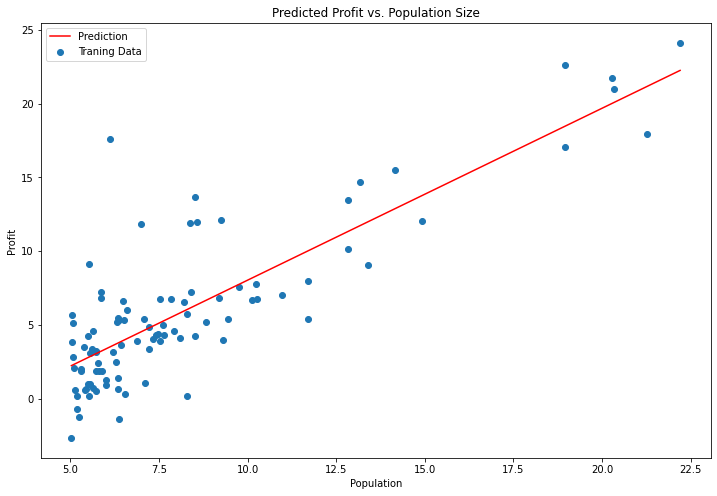

In [17]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

### 3 多变量线性回归

ex1data2.txt里的数据，第一列是房屋大小，第二列是卧室数量，第三列是房屋售价

根据已有数据，建立模型，预测房屋的售价

In [18]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### 3.1 特征归一化
观察数据发现，size变量是bedrooms变量的1000倍大小，统一量级会让梯度下降收敛的更快。做法就是，将每类特征减去他的平均值后除以标准差

In [19]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


#### 3.2 梯度下降

In [20]:
data2.insert(0, 'Ones', 1)

cols = data2.shape[1]
X2 = data2.iloc[:, : -1]
y2 = data2.iloc[:, cols-1: cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0, 0, 0]))

g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
g2

matrix([[-1.10898288e-16,  8.84042349e-01, -5.24551809e-02]])

#### 3.3 正规方程
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的:$\frac{\partial}{\partial\theta_j}J(\theta_j)=0$

假设我们的训练集特征矩阵为X(包含了$x_0=1$)并且我们的训练集结果为向量y，则利用正规方程解出向量$\theta=(X^TX)^{-1}X^Ty$

上标T代表矩阵转置，上标-1代表矩阵的逆。设矩阵$A=X^TX$，则：$(X^TX)^{-1}=A^{-1}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率$\theta$，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型。

正规方程：不需要选择学习率$\alpha$，一次计算出，需要计算$(X^TX)^{-1}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为O($n^3$)，通常来说当n小于10000时还是可以接受的，只适用于线性模型，不适合逻辑回归等其他模型。

In [21]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [22]:
final_theta2 = normalEqn(X, y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

In [23]:
result = gradientDescent(X, y ,theta, alpha, iters)
result

(matrix([[-3.63029144,  1.16636235]]),
 array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
        4.48338826]))